# Pridicting heart disease using machine learning 

In [57]:
# Importing libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Model form scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pickle

## Load Data

In [2]:
df = pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# lets find out how many of each classes are there
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease according to sex

In [6]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [7]:
# compare the target column with sex column
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


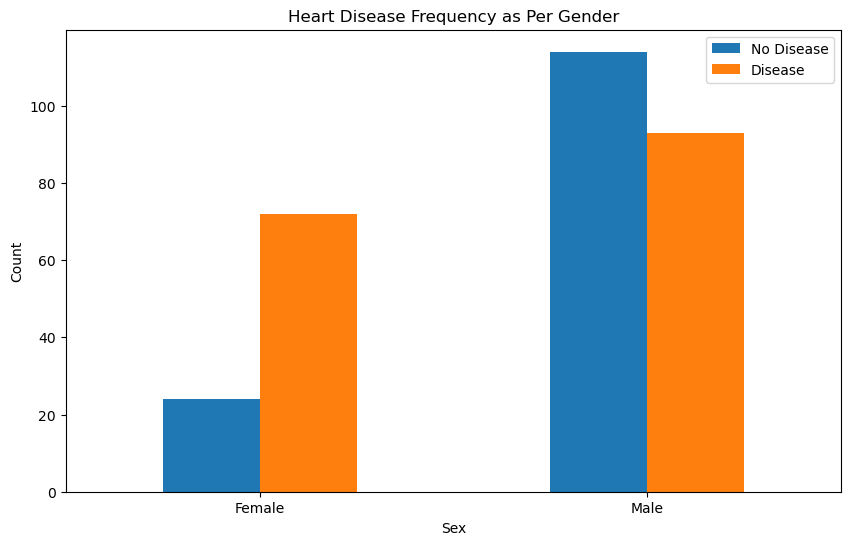

In [8]:
# ploting the crosstab
pd.crosstab(df.sex,df.target).plot(kind = "bar",
                                  figsize = (10,6),
                                  color = ['#1f77b4', '#ff7f0e'])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Heart Disease Frequency as Per Gender")
plt.legend(["No Disease", "Disease"]) 
plt.xticks(ticks=[0,1], labels=["Female", "Male"], rotation=0)
plt.show()

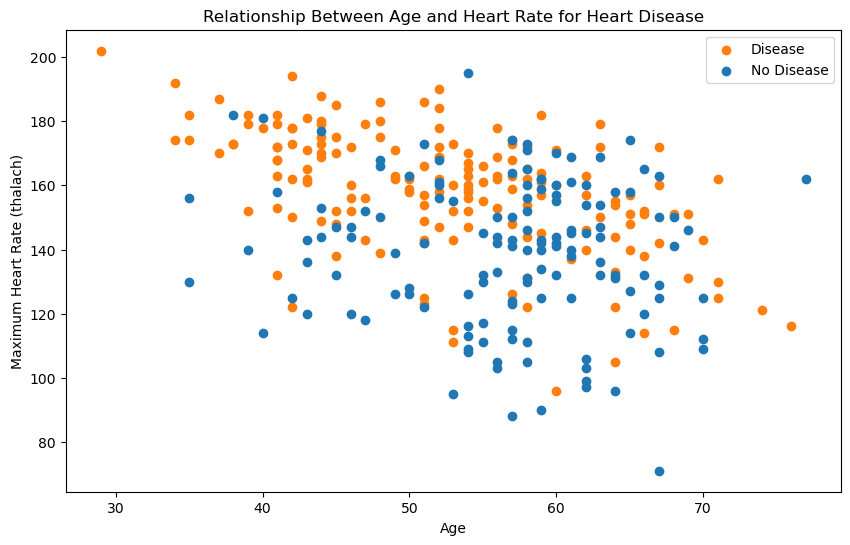

In [9]:
# finding patterns bitween heart rate and age for heart disease
plt.figure(figsize=(10,6))

# scatter when there is heart heart disease
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = '#ff7f0e')

# scatter when there is no heart heart disease
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = '#1f77b4')

plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.title("Relationship Between Age and Heart Rate for Heart Disease")
plt.legend(["Disease", "No Disease"]) 
plt.show()

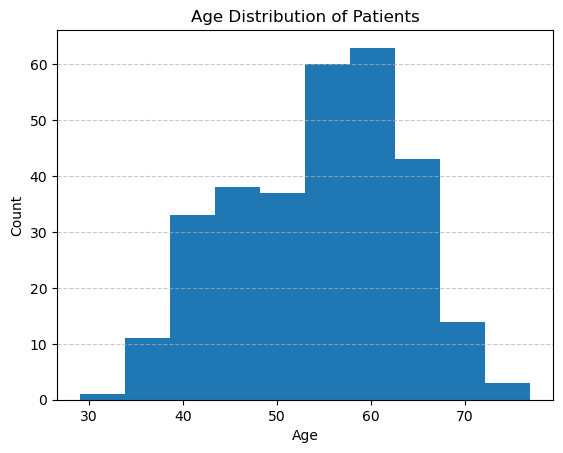

In [10]:
# check the distribution of the age for with histogram
df.age.plot.hist()

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Patients")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Heart disease frequency per Chest Pain type

In [11]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


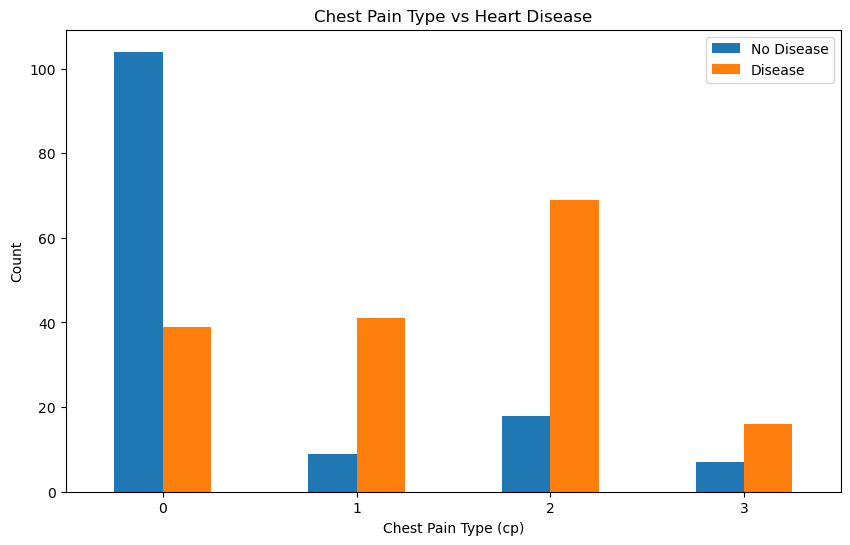

In [12]:
# ploting the corsstab
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                  figsize = (10,6),
                                  color = ['#1f77b4', '#ff7f0e'])

plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.title("Chest Pain Type vs Heart Disease")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

In [13]:
# Correlation between all independent variables
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


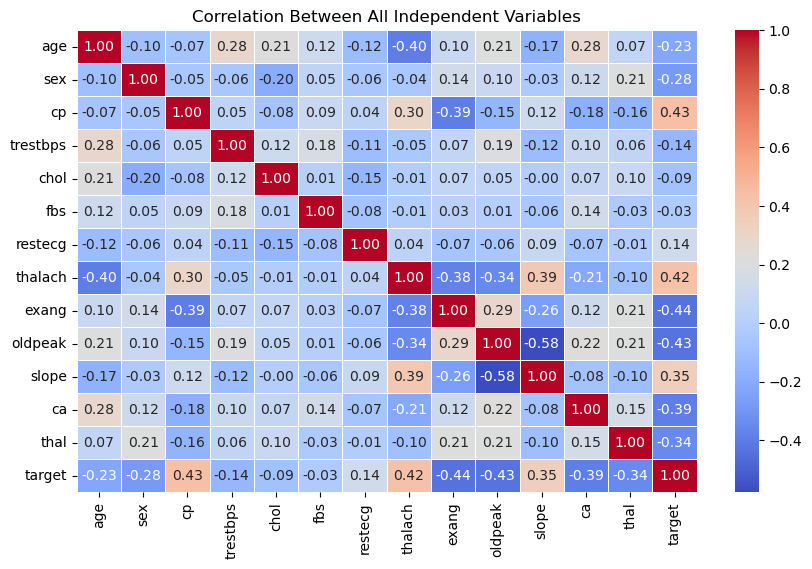

In [14]:
# Correlation Matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Between All Independent Variables")
plt.show()

In [15]:
# spliting the data into X and y
X = df.drop("target", axis = 1)
y = df["target"]

In [16]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
# Split the data into try and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size= 0.2)

Now as we have split the data into train and test sets.
We will train it to find the patterns on the training set
And test it on the test set


In [19]:
# Put models in a dictionary 
models = {"Logistic Regresstion": LogisticRegression(max_iter=2000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models 
def fitAndScore(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    # Make the dictionary to keep model scores
    modelScores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to data 
        model.fit(X_train, y_train)

        # Evaluate the model and append its score to modelScores
        modelScores[name] = model.score(X_test,y_test)
    return modelScores

In [20]:
modelScores = fitAndScore(models, X_train, X_test, y_train, y_test)
print(modelScores)

{'Logistic Regresstion': 0.8688524590163934, 'KNN': 0.6885245901639344, 'Random Forest': 0.8360655737704918}


### Model Comparision

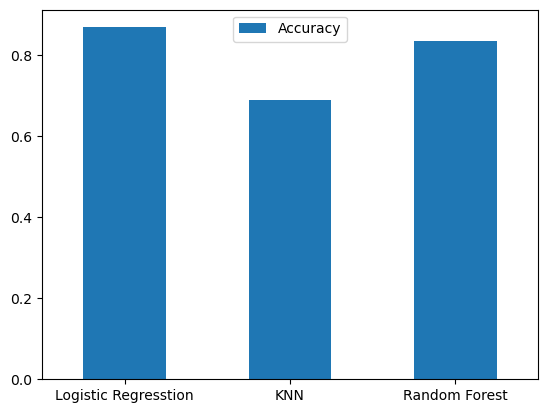

In [21]:
compareModel = pd.DataFrame(modelScores, index = ["Accuracy"])
compareModel.T.plot.bar()
plt.xticks(rotation=0)
plt.show()

As our model's first predictions aren't as per our base
##### Now let's look at the following
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Corss-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning


In [22]:
# Tune KNN
trainScores = []
testScores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    knn.fit(X_train, y_train)

    # Update the training scores list
    trainScores.append(knn.score(X_train, y_train))

    # Update the test scores list
    testScores.append(knn.score(X_test,y_test))

In [23]:
trainScores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [24]:
testScores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


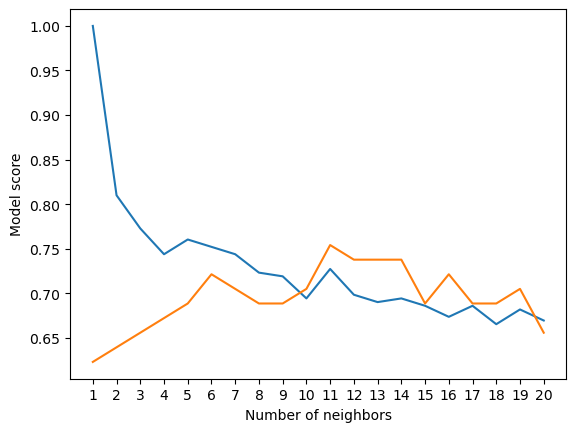

In [25]:
plt.plot(neighbors, trainScores, label = "Train Score")
plt.plot(neighbors, testScores, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
print(f"Maximum KNN score on the test data: {max(testScores)*100:.2f}%")
plt.show()

## Hyperparameter tuning with RandomizedSearchCV
We are going to tune:
* LogisticRegression()
* RandomForestClassifier()


In [26]:
# Create a hyperparameter grid for LogisticRegression
logRedGrind = {"C": np.logspace(-4,4,20),
              "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rfGrid = {"n_estimators": np.arange(10,1000,50),
         "max_depth": [None,3,5,10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2),}

In [27]:
# Tune LogisticRegression
np.random.seed(42)

# Setup hyperparameter search for LogisticRegression
rsLogReg = RandomizedSearchCV(LogisticRegression(),
                              param_distributions= logRedGrind,
                              cv = 5,
                             n_iter= 20,
                             verbose= True)

# Fit random hyperparameter search model for LogisticRegression
rsLogReg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
rsLogReg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
rsLogReg.score(X_test,y_test)

0.8852459016393442

In [30]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup hyperparameter search for RandomForestClassifier
rsRf = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions= rfGrid,
                              cv = 5,
                             n_iter= 20,
                             verbose= True)

# Fit random hyperparameter search model for RandomForestClassifier
rsRf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
rsRf.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=19, min_samples_split=4,
                       n_estimators=210)

In [32]:
rsRf.score(X_test,y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV
As our LogisticRegression model provides the best scores so far, so we will try to imporve it using GridSearchCV

In [33]:
# Different hyperparameters for our LogisticRegression model
logRedGrind = {"C": np.logspace(-4,4,30),
              "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gsLogReg = GridSearchCV(LogisticRegression(),
                              param_grid= logRedGrind,
                              cv = 5,
                             verbose= True)

# Fit grid hyperparameter search model for LogisticRegression
gsLogReg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [34]:
gsLogReg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [35]:
gsLogReg.score(X_test,y_test)

0.8852459016393442

## Evakuate our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [36]:
# To make comparisons and evaluate our trained model, first we need to make predictions
yPreds = gsLogReg.predict(X_test)
yPreds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

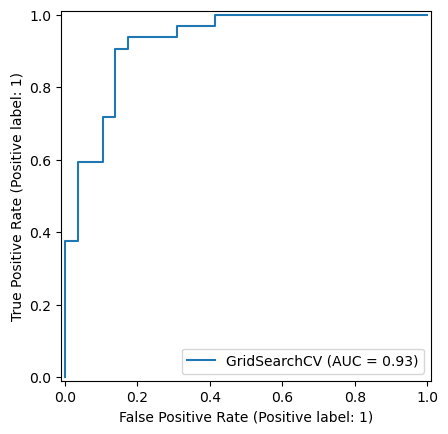

In [37]:
# Plot ROC curve and calculate and calculate AUC matric
RocCurveDisplay.from_estimator(gsLogReg, X_test, y_test)
plt.show()

In [38]:
# Confusion matrix
print(confusion_matrix(y_test, yPreds))

[[25  4]
 [ 3 29]]


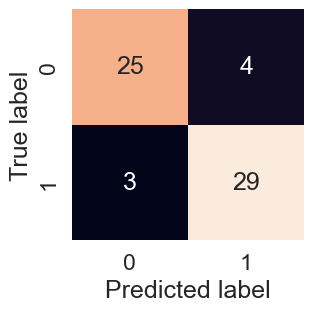

In [39]:
# Ploting confusion matix using seaborn's heatmap()
sns.set(font_scale = 1.5)
def plotConfMat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, yPreds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label") 
    plt.show()
    
plotConfMat(y_test, yPreds)

In [40]:
# Classification report
print(classification_report(y_test, yPreds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation
now we are calculating accuracy, precision, recall and f1-score of model with cross-validation using cross_val_score()

In [41]:
# check the best hyperparameter
gsLogReg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
# Create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                         solver= "liblinear")

In [43]:
# Class-validated accuracy
cvAccuracy = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring= "accuracy")

cvAccuracyMean = np.mean(cvAccuracy)
cvAccuracyMean

0.8446994535519124

In [44]:
# Class-validated precision
cvPrecision = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring= "precision")

cvPrecisionMean = np.mean(cvPrecision)
cvPrecisionMean

0.8207936507936507

In [45]:
# Class-validated recall
cvRecall = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring= "recall")

cvRecallMean = np.mean(cvRecall)
cvRecallMean

0.9212121212121213

In [46]:
# Class-validated f1-score
cvF1 = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring= "f1")

cvF1Mean = np.mean(cvF1)
cvF1Mean

0.8673007976269721

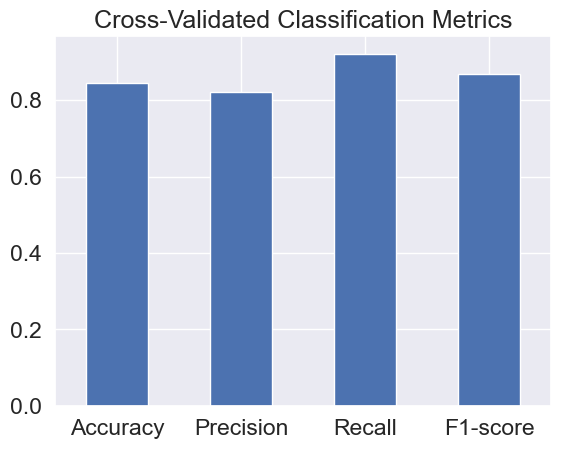

In [47]:
# Visualize cross-validated metrics
cvMatrics = pd.DataFrame({"Accuracy": [cvAccuracyMean],
                        "Precision": [cvPrecisionMean],
                        "Recall": [cvRecallMean],
                        "F1-score": [cvF1Mean]})

cvMatrics.T.plot.bar(title = "Cross-Validated Classification Metrics",
                    legend = False)
plt.xticks(rotation=0)
plt.show()

### Feature importance
Feature importance is another as asking which feature contributed the most to the outcomes of the model and how did they contribute

In [48]:
# Fit an instance of LogisticRegression
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [49]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [50]:
# Match coef's of features to columns 
featureDict = dict(zip(df.columns, list(clf.coef_[0])))
featureDict

{'age': 0.003167280425913024,
 'sex': -0.8604465017405314,
 'cp': 0.6606704375815468,
 'trestbps': -0.011569931400895204,
 'chol': -0.0016637445504085657,
 'fbs': 0.04386110683275644,
 'restecg': 0.3127584216723769,
 'thalach': 0.024593614040407018,
 'exang': -0.6041307979006147,
 'oldpeak': -0.5686280785492623,
 'slope': 0.45051628777983527,
 'ca': -0.6360989513753182,
 'thal': -0.6766337783287578}

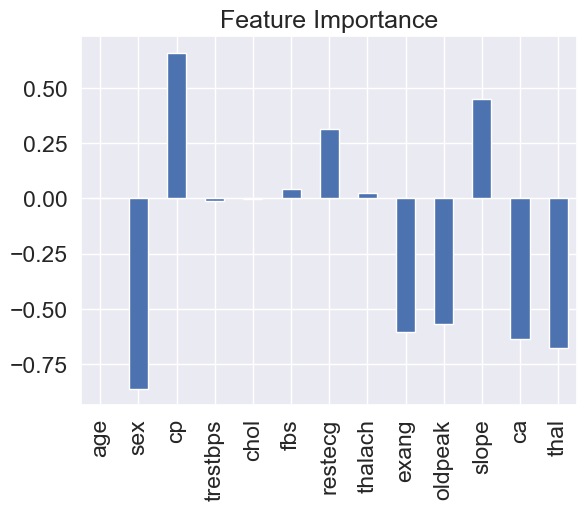

In [51]:
# Visualize feature importance 
featureDf = pd.DataFrame(featureDict, index = [0])
featureDf.T.plot.bar(title = "Feature Importance", legend = False);
plt.show()

In [52]:
with open("heartModel.pkl", "wb") as f:
    pickle.dump(clf, f)